In [75]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
%matplotlib inline


In [76]:
#import Csv
redWine = pd.read_csv('/Users/heath/Project-3-Wine/Data/wineQualityReds.csv', index_col=0)
whiteWine = pd.read_csv('/Users/heath/Project-3-Wine/Data/wineQualityWhites.csv', index_col=0)

In [77]:
#add color to the csvs based on data location
redWine['wine_color'] = 'red'
whiteWine['wine_color'] = 'white'
redWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol,quality,wine_color
id,,,,,,,,,,,,,
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [78]:
#rename white wine data set columns that are mismatched to red wine data
whiteWine.rename({"fixed.acidity": "fixed acidity",
                 "volatile.acidity": "volatile acidity",
                 "citric.acid": "citric acid",
                 "residual.sugar": "residual sugar",
                 "free.sulfur.dioxide": "free sulfur dioxide",
                 "total.sulfur.dioxide": "total sulfur dioxide",
                 "pH": "ph"},
                axis = "columns", inplace = True)


whiteWine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol,quality,wine_color
1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
2,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
3,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
5,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [79]:
#concatenate red & white wine frames
frames = [redWine, whiteWine]
wine = pd.concat(frames)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol,quality,wine_color
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [80]:
#summarize wine data----- white wine data much more prevalent
wine.info()
wine['wine_color'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 1 to 4898
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   ph                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_color            6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


white    4898
red      1599
Name: wine_color, dtype: int64

In [81]:
#encode white wine color data
label_color = LabelEncoder()
wine['wine_color']= label_color.fit_transform(wine['wine_color'])
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol,quality,wine_color
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [82]:
#Separate dataset as response variable & feature variable
X = wine.drop('wine_color', axis =1)
y = wine['wine_color']

In [83]:
#split train data & test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state =42)

In [84]:
#print shape of train & test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 12)
(1300, 12)
(5197,)
(1300,)


In [85]:
#apply scaling to get optimized result- limits bias by not allowing large numbers in a field to overpower smaller numbers in another
#ie sulfur v chlorides

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc = sc.transform(X_test)

In [86]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [87]:
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       341
           1       0.99      1.00      1.00       959

    accuracy                           1.00      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300

[[336   5]
 [  1 958]]


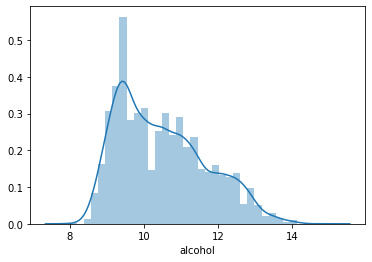

In [92]:
sns.distplot(wine['alcohol'])
